In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(123)

In [4]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

# OLS Regression

In [15]:
topn=20

In [16]:
X = housing['data'][:topn,:1]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     62.44
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           2.92e-07
Time:                        15:44:02   Log-Likelihood:                -10.134
No. Observations:                  20   AIC:                             24.27
Df Residuals:                      18   BIC:                             26.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0572      0.206      5.138      0.0

# Plot x1 against predicted values to see the variation

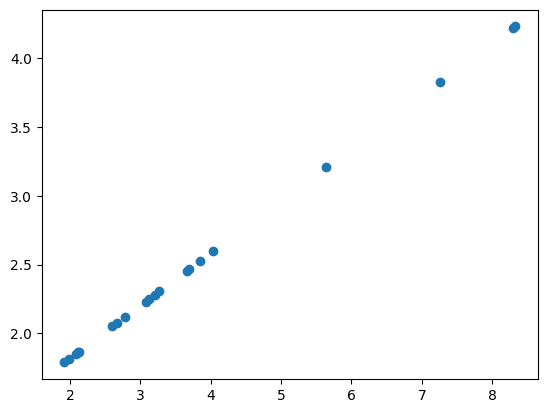

In [17]:
x1 = housing['data'][:topn,0]
y_hat = res.fittedvalues
plt.scatter(x1, y_hat)

Straight line no variation because there is only one dimension

In [18]:
X = housing['data'][:topn,:2]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     33.11
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.37e-06
Time:                        15:44:09   Log-Likelihood:                -9.2232
No. Observations:                  20   AIC:                             24.45
Df Residuals:                      17   BIC:                             27.43
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1124      0.941     -0.119      0.9

R2 has sincreased

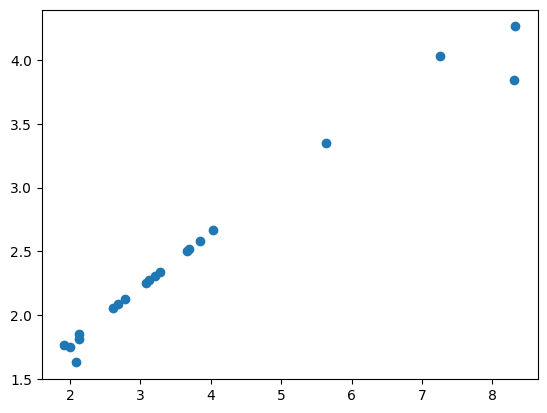

In [19]:
plt.scatter(x1, res.fittedvalues)

Variation has increased because now there is an extra dimension, for each value of X there may be also different ages for the houses that can also contribute to the house price.

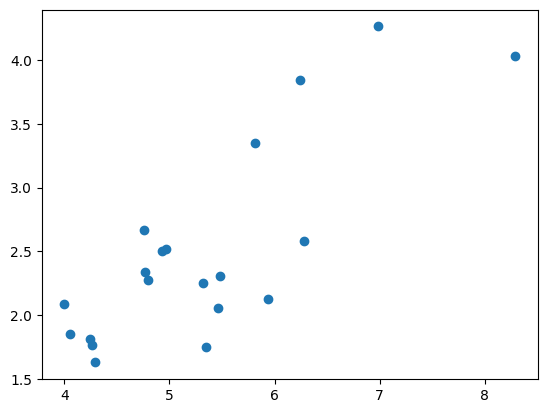

In [20]:
# House Age
x2 = housing['data'][:topn, 2]
plt.scatter(x2, res.fittedvalues)

In [21]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     12.03
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           0.000118
Time:                        15:52:05   Log-Likelihood:                -6.3046
No. Observations:                  20   AIC:                             26.61
Df Residuals:                      13   BIC:                             33.58
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      3.635      0.005      0.9

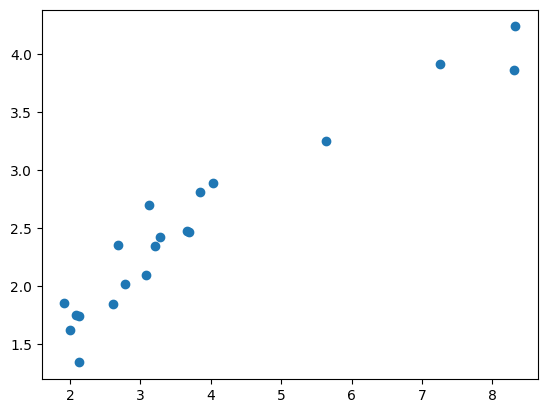

In [22]:
plt.scatter(x1, res.fittedvalues)

Generally, the more variable we add, the variation will occur in our regression model, and increase the variance of our OLS regression.

#### How can we add variables without risking overfitting?
#### By regularization (adding bias)

# Ridge Regression

statsmodels.regression.linear_model.OLS.fit_regularized:

L1_wt: fraction of the penalty given to L1 penalty term. Must be between 0 nand 1. If 0, the fit is a ridge fit, if 1 then lasso fit.

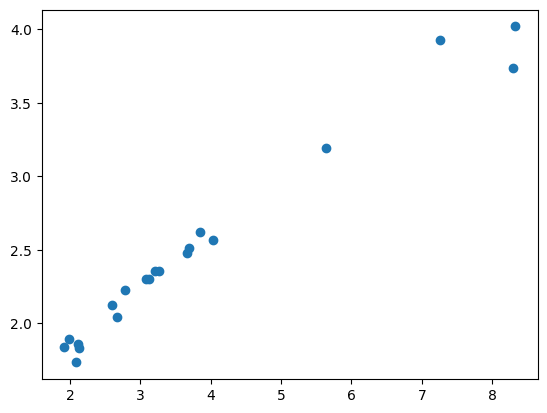

In [25]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=0)
plt.scatter(x1, res.fittedvalues)

In [26]:
res.params

array([ 9.43710490e-03,  3.45901690e-01,  1.64002452e-02,  7.62706124e-02,
        1.17731611e-02,  4.47719623e-05, -3.94367829e-02])

# Regularization too high

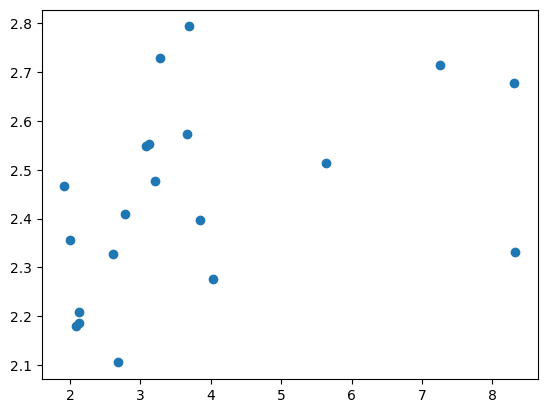

In [27]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=20, L1_wt=0)
plt.scatter(x1, res.fittedvalues)

In [29]:
res.params

array([0.00297732, 0.07678914, 0.02974868, 0.04176642, 0.00309189,
       0.00047073, 0.00883524])

# Lasso Regression

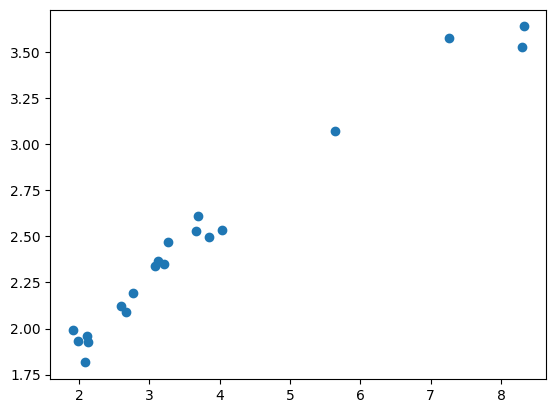

In [30]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=1)
plt.scatter(x1, res.fittedvalues)

In [35]:
res.params

array([0.        , 0.        , 0.01247736, 0.        , 0.        ,
       0.00159103, 0.        ])

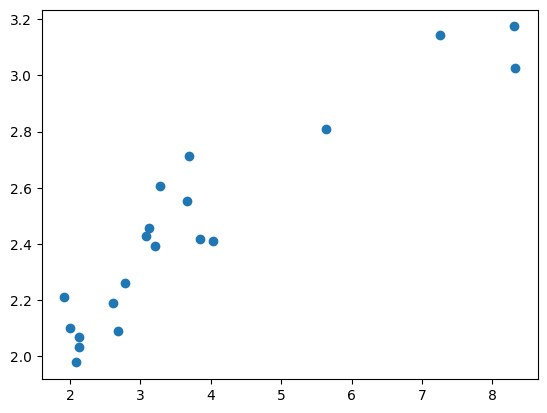

In [31]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=1, L1_wt=1)
plt.scatter(x1, res.fittedvalues)

In [34]:
res.params

array([0.        , 0.        , 0.01247736, 0.        , 0.        ,
       0.00159103, 0.        ])

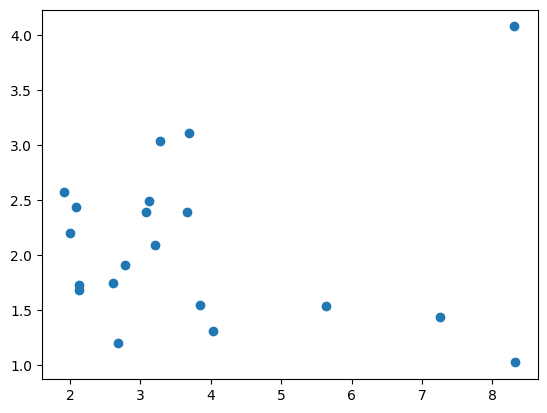

In [32]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=20, L1_wt=1)
plt.scatter(x1, res.fittedvalues)

If we regularize too much lasso regression will throw out all our coefficients.

In [33]:
res.params

array([0.        , 0.        , 0.01247736, 0.        , 0.        ,
       0.00159103, 0.        ])

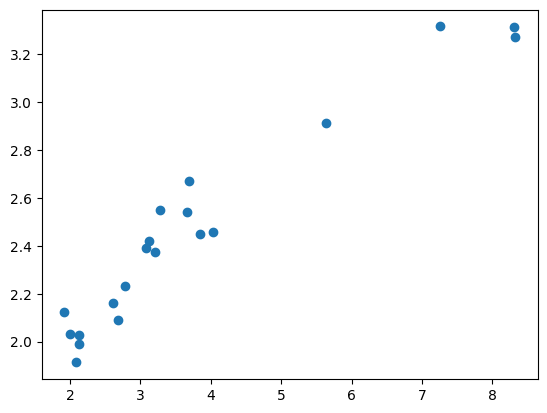

In [36]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.8, L1_wt=1)
plt.scatter(x1, res.fittedvalues)

In [37]:
res.params

array([0.        , 0.25907503, 0.02508605, 0.        , 0.        ,
       0.00026565, 0.        ])

# Elasticnet Regression
Balance between L1 and L2 Regression. If L1_weight is 0.5 then L2_weight is 0.5, if L1_weight is 0 then L2_weight is 1.

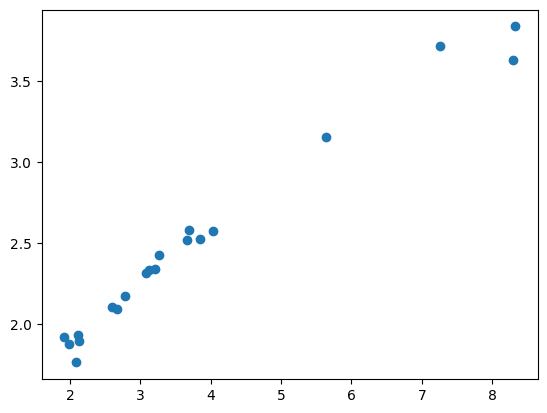

In [38]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=0.5)
plt.scatter(x1, res.fittedvalues)

In [39]:
res.params

array([0.00000000e+00, 3.51223025e-01, 2.14277789e-02, 0.00000000e+00,
       0.00000000e+00, 1.10253819e-04, 0.00000000e+00])

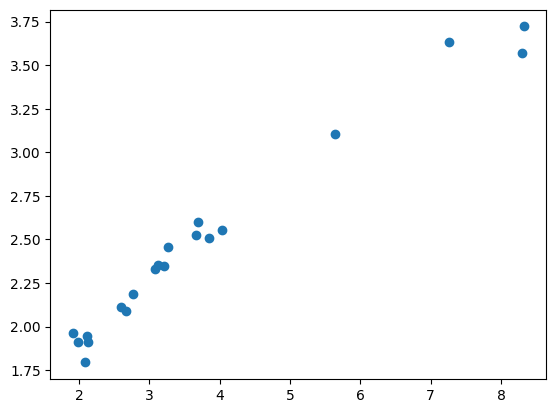

In [40]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=0.8)
plt.scatter(x1, res.fittedvalues)

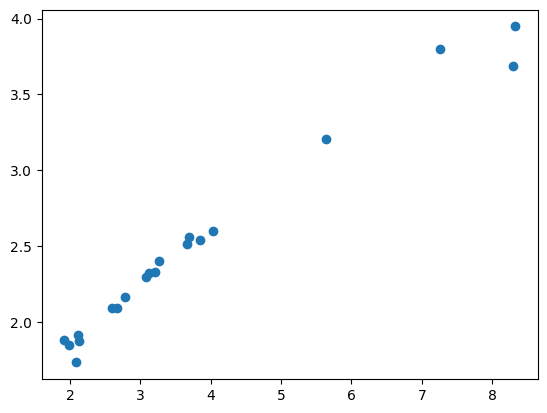

In [41]:
X = housing['data'][:topn,:6]
X = sm.add_constant(X)
y = housing['target'][:topn]
res = sm.OLS(y, X).fit_regularized(alpha=0.5, L1_wt=0.2)
plt.scatter(x1, res.fittedvalues)

#### How do we know which one is best? Check with cross-validation!

# Predict Values

In [42]:
new_data = housing['data'][51:60,:6]
new_data = sm.add_constant(new_data)
y_hat = res.predict(new_data)
y_hat

array([1.53187416, 1.41554625, 1.63208499, 1.72954055, 1.64652776,
       1.68495115, 1.43934486, 1.61397043, 0.99400374])